In [8]:
%reset -f

In [9]:
import random
from math import sqrt, sin, cos, exp, pow, pi, log
import handcalcs.render
import numpy as np
import sympy as sp
import copy
from sympy import Symbol as symbol
import matplotlib.pyplot as plt
PD = 184
from mpl_toolkits import mplot3d
import scipy.stats as stats
from scipy import integrate
%matplotlib inline
# from markovchain import MarkovChain as MC
from IPython.display import display, HTML

In [10]:
def Print2D(_data, _col_names=[], _row_names=[]):
    data = copy.deepcopy(_data)
    col_names = copy.deepcopy(_col_names)
    row_names = copy.deepcopy(_row_names)
    
    if len(col_names) > len(data[0]):
        col_names.insert(0, "\\")
    elif len(row_names) != 0:
        while len(col_names) < len(data[0]) + 1:
            col_names.insert(0, "_")
        
    markdown = "<table>"
    if len(col_names) != 0:
        markdown += "<tr>"
        for i in range(len(col_names)):
            markdown += "<th>"+str(col_names[i])+"</th>"
        markdown += "</tr>"
    for i in range(len(data)):
        markdown += "<tr>"
        if (i + 1) <= len(row_names):
            markdown += "<th>"+str(row_names[i])+"</th>"
        for j in range(len(data[0])):
            markdown += "<td>"+str(data[i][j])+"</td>"
        markdown += "</tr>"
    markdown += "</table>"
        
    display(HTML(markdown))

In [11]:
# P*b*(1-mu**2)/E
# x1*x1*(1-x4**2)/x3
def F(arr):
    return arr[0]*arr[1]*(1-(arr[3]**2))/arr[2]

def FuncParamVariation(var_i=0, var=0.1, visible=False, N=100):
    col_labels = ["x1", "x2", "x3", "x4", "F", "st_dev"]
    row_labels = ["M", "SIG", "K_VAR"]
    M = [10, 100, 15000, 0.4]
    SIG = [1, 10, 1500, 0.04]
    
    M.append(F(M))
    SIG.append(0)
    K_VAR = []
    for i in range(len(M)):
        if i == var_i:
            SIG[i] = var * M[i]
        K_VAR.append(SIG[i]/M[i])
    if visible:
        Print2D([M,SIG,K_VAR], col_labels, row_labels)
    
    xij = []
    for i in range(N):
        temp1 = []
        for j in range(len(M)-1):
            ksi = (np.sum([np.random.uniform(0, 1) for _ in range(12)]) - 6)
            temp1.append((M[j]*(1+(K_VAR[j]*ksi))))
        temp2 = F(temp1)
        temp3 = (M[-1] - temp2)**2
        xij.append(temp1 + [temp2, temp3])
    if visible:
        Print2D(xij, col_labels)
    
    sig_sum = 0
    sig_count = 0
    for i in range(N):
        sig_sum += xij[i][-1]
        sig_count += 1
    SIG[-1] = np.sqrt(sig_sum/sig_count)
    K_VAR[-1] = SIG[-1]/M[-1]
    if visible:
        Print2D([M,SIG,K_VAR], col_labels, row_labels)
        display(str(M[-1]-SIG[-1])+" < G < "+str(M[-1]+SIG[-1]))
    
    if not visible:
        return K_VAR[-1]


In [12]:
FuncParamVariation(var_i=0, var=0.0, visible=True, N=10)

x1,x2,x3,x4,F,st_dev
10.0,111.75743880894929,16350.205822035154,0.40654773525925325,0.057054970291124364,1.1129623151550233e-06
10.0,97.27783519871333,16253.598056377536,0.4929982121058107,0.045303646530042846,0.00011441197755426448
10.0,96.80191277490896,15947.374570396192,0.35928786841108934,0.05286510899948317,9.827541585121414e-06
10.0,95.97461438716235,17488.012313257725,0.41962491797837065,0.04521664103758222,0.00011628083051235595
10.0,110.71065455429223,15403.061004227751,0.4571014071152421,0.05685790802204482,7.360061742888584e-07
10.0,100.71137474509342,17086.581153965744,0.36163972951359535,0.05123319207488376,2.272245779495098e-05
10.0,109.37774497499638,17963.176070536312,0.449533900186875,0.048585289352223046,5.497793399025695e-05
10.0,106.41165252681235,16373.84819597703,0.3109410103927621,0.058705390430481,7.319137381338171e-06
10.0,107.57471679559971,13533.277015134212,0.464099553231328,0.06236802148860954,4.055169767939281e-05
10.0,96.39547340331947,15476.311085165924,0.47576893819901733,0.048187046161916734,6.104224767602005e-05


'0.04945032220133582 < G < 0.06254967779866419'

In [6]:
gamma_percent = []
percents = np.linspace(0, 0.2, 5)
gamma_col_labels = [str(percent) for percent in percents]
gamma_row_labels = ["gamma_x1", "gamma_x2", "gamma_x3", "gamma_x4"]
        
for i in range(len(gamma_row_labels)):
    gamma_percent.append([])
    for j in range(len(gamma_col_labels)):
        gamma_percent[i].append(FuncParamVariation(i, percents[j]))

Print2D(gamma_percent, gamma_col_labels, gamma_row_labels)

\,0.0,0.05,0.1,0.15000000000000002,0.2
gamma_x1,0.17088414747395014,0.1567789571277339,0.19524293496608272,0.23112831357407768,0.2715000588113458
gamma_x2,0.1687078310065749,0.15874975896835897,0.18350913608261576,0.22432956481601277,0.2885819684342984
gamma_x3,0.14608576695096576,0.143112761258401,0.18086744218633502,0.23100211444063462,0.28927259586111675
gamma_x4,0.19419103860204587,0.1731426173609141,0.2169430176633562,0.16430487715320055,0.1974393480008626



m
       4       3         2
414.8 x - 198 x + 32.95 x - 1.487 x + 0.1709

b
       4         3         2
173.5 x - 76.93 x + 15.45 x - 0.8008 x + 0.1687

g
       4      3         2
160.7 x - 86 x + 18.23 x - 0.7762 x + 0.1461

r
      4       3         2
2290 x - 902 x + 108.2 x - 3.862 x + 0.1942
Figure(1104x736)


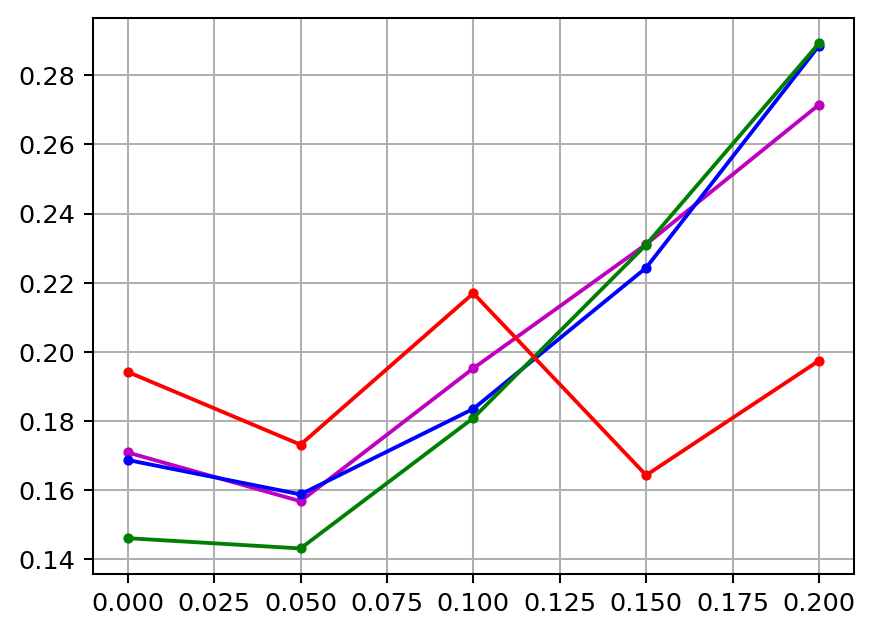

<Figure size 432x288 with 0 Axes>

In [7]:
fig = plt.figure(dpi=PD)
colors = ['r', 'g', 'b', 'm']
for row in gamma_percent:
    color = colors.pop()
    x = percents
    y = row
    t = np.polyfit(x, y, 4)
    f = np.poly1d(t)
    plt.plot(x, y, color+'.', x, f(x), color)
    print("\n" + color)
    print(f)
plt.grid()
plt.axis('scaled')
print(fig)
plt.figure().clear()